# Testing the gym-2048 0.2.6 environment

In [8]:
import numpy as np
import time
from IPython.display import clear_output
import matplotlib.pyplot as plt

In [2]:
from envs import game2048_env

In [3]:
id_action_dict = {0 : "UP",
                  1 : "RIGHT",
                  2 : "DOWN",
                  3 : "LEFT"}

{'illegal_move': False, 'highest': 16}
Next Action: RIGHT 
Reward: 0.0


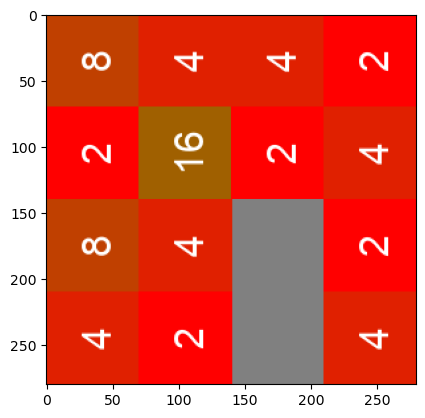

In [ ]:
env = game2048_env.Game2048Env()
env.seed()

env.reset()
#env.render()

done = False
moves = 0
while not done:
    clear_output(wait=True)
    
    action = env.np_random.choice(range(4), 1).item()
    next_state, reward, done, info = env.step(action)
    moves += 1
    
    print(info)
    
    print(f'Next Action: {id_action_dict[action]} \nReward: {reward}')
    rgb = env.render('rgb_array')
    
    plt.imshow(rgb[::-1, :, :])
    
    plt.show()
    
    time.sleep(.5)

print('\nTotal Moves: {}'.format(moves))

# Testing gym-2048

https://github.com/mllobet/gym-2048

**ATTENTION** : the gym version to use is **0.17.0**

In [1]:
import numpy as np
import time
from IPython.display import clear_output

In [2]:
import gym_2048

In [3]:
import gym

In [4]:
gym.__version__

'0.17.0'

In [6]:
env = gym.make('game-2048-v0')
#env.seed()

state = env.reset()

done = False
moves = 0
while not done:
    clear_output(wait=True)
    
    valid_moves = np.where(env.moves_available())[0]
    
    action = np.random.choice(valid_moves, 1).item()
    next_state, reward, done, info = env.step(action)
    moves += 1
    
    #print(f'Next Action: {id_action_dict[action]} \nReward: {reward}')
    env.render('human')
    print(info)
    
    time.sleep(.5)

print('\nTotal Moves: {}'.format(moves))

 0  0  4  0
 0  2 16  0
 2  0  4  4
 4  0  2 16
Score: 124
Move: 2
{'score': 124, 'won': False}


KeyboardInterrupt: 

In [7]:
next_state

[[0, 0, 4, 0], [0, 2, 16, 0], [2, 0, 4, 4], [4, 0, 2, 16]]